## Navigation Project

![](https://user-images.githubusercontent.com/10624937/42135619-d90f2f28-7d12-11e8-8823-82b970a54d7e.gif)

- More info about the purpose of the project can be read here : [Udacity Project link](https://github.com/udacity/deep-reinforcement-learning/tree/master/p1_navigation)


## Prerequisites

- Create a python env as described here: https://github.com/udacity/deep-reinforcement-learning/tree/master/python

- Download the project structure here : [github](https://github.com/antoniopenta/deep_reinforcement_learning/tree/master/drl_navigation) 

- You need to download the unity env Banana at the following link (Mac) and save it (unzipped) in the env folder of the main project:  https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana.app.zip
 


## Project Structure

- The project has these foldes:
    - **data**: it contains data that are created during the execution
    - **framework**: it contain the code for the agents and the network for learning the Q function
    - **env**: where the unity env is store
    - **model**: where the checkpoint for the network is saved
    - **jupyter**: where the notebook with the explanation is store
    
     

## Scripts to Run 

- There are two main scripts in the main foler:
    - main_script_dq_test.py, which is used to see the agent in action loading the weights of the network that have been learned during the train
    - main_script_dq_train.py, which is used to train the agent
  
    
    

- Example of output when you run the main_script_dq_train.py :

```sh
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.16895212 0.
 1.         0.         0.         0.20073597 1.         0.
 0.         0.         0.12865657 0.         1.         0.
 0.         0.14938059 1.         0.         0.         0.
 0.58185619 0.         1.         0.         0.         0.16089135
 0.         1.         0.         0.         0.31775284 0.
 0.        ]
States have length: 37
Episode 100	Average Score: 0.95

----------------------------------------------------------------------------------------------------
Episode 100	Average Score: 0.95
Episode 100	Average Eps: 0.61
Episode 100	Action Distribution turn right : 0.15
Episode 100	Action Distribution turn left : 0.20
Episode 100	Action Distribution move forward : 0.46
Episode 100	Action Distribution move backward : 0.19
----------------------------------------------------------------------------------------------------
Episode 200	Average Score: 4.81

----------------------------------------------------------------------------------------------------
Episode 200	Average Score: 4.81
Episode 200	Average Eps: 0.37
Episode 200	Action Distribution turn right : 0.31
Episode 200	Action Distribution move forward : 0.34
Episode 200	Action Distribution turn left : 0.17
Episode 200	Action Distribution move backward : 0.18
----------------------------------------------------------------------------------------------------
Episode 300	Average Score: 8.41

----------------------------------------------------------------------------------------------------
Episode 300	Average Score: 8.41
Episode 300	Average Eps: 0.22
Episode 300	Action Distribution move forward : 0.44
Episode 300	Action Distribution turn left : 0.24
Episode 300	Action Distribution move backward : 0.19
Episode 300	Action Distribution turn right : 0.13
----------------------------------------------------------------------------------------------------
Episode 400	Average Score: 10.10

----------------------------------------------------------------------------------------------------
Episode 400	Average Score: 10.10
Episode 400	Average Eps: 0.14
Episode 400	Action Distribution move forward : 0.58
Episode 400	Action Distribution turn left : 0.17
Episode 400	Action Distribution turn right : 0.23
Episode 400	Action Distribution move backward : 0.02
----------------------------------------------------------------------------------------------------
Episode 500	Average Score: 12.43

----------------------------------------------------------------------------------------------------
Episode 500	Average Score: 12.43
Episode 500	Average Eps: 0.08
Episode 500	Action Distribution move forward : 0.70
Episode 500	Action Distribution move backward : 0.02
Episode 500	Action Distribution turn left : 0.14
Episode 500	Action Distribution turn right : 0.14
----------------------------------------------------------------------------------------------------
Episode 600	Average Score: 13.94

----------------------------------------------------------------------------------------------------
Episode 600	Average Score: 13.94
Episode 600	Average Eps: 0.05
Episode 600	Action Distribution turn left : 0.26
Episode 600	Action Distribution move forward : 0.49
Episode 600	Action Distribution turn right : 0.25
----------------------------------------------------------------------------------------------------
Episode 657	Average Score: 15.05
Environment solved in 557 episodes!	Average Score: 15.05

Process finished with exit code 0

```

## Algorithm Explanation

- The agent implement the DeepQ-Learning approach with a Reply Buffer mechanism.
- The code is similar to the one provided by the exercise.
- The agent is trained with ADAM, which is a variant of stochastic gradient descent which includes momentum and in general trains faster than your basic SGD.



## Algorithm Seettings

In [14]:
#HyperParemeter  for the agent:

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network



In [15]:
#HyperParemeter  for the dqlearning algorithm 
# n_episodes (int): maximum number of training episodes
# max_t (int): maximum number of timesteps per episode
# eps_start (float): starting value of epsilon, for epsilon-greedy action selection
# eps_end (float): minimum value of epsilon
# eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
# max_score (float): that target score that we would like to reach, the benchmark is 15 in 1700 episode

n_episodes = 2000
max_t = 1000
eps_start = 1.0
eps_end = 0.001
eps_decay = 0.995
max_score = 15

- I have target a max score of 15 within 2000 episodes as suggested by the picture in the benchmark explantion

## Algorithm Results

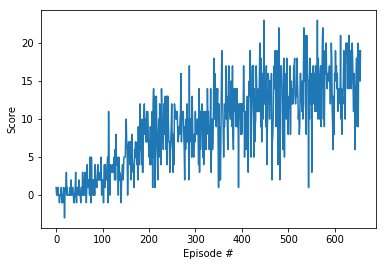

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#i load only the first run scores, 
path_scores = '../data/scores_1.txt'
with open(path_scores) as f:
    array_scores = np.array([float(item) for item in f.readlines()])
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(array_scores)), array_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

The above results have been obtained using the model stored in the model folder named : **checkpoint_1.pth**

In [17]:
## Analysis and new Exploration

- For 3 runs, I have observed the following distribution of actions, and the related increment score, which is the incremenet/descrement of the average score respect to thre previou session

| run | episode_num | avg_eps     | average_score | move forward | move backward | turn left | turn right | increment score |
|-----|-------------|-------------|---------------|--------------|---------------|-----------|------------|-----------------|
| 1   | 100         | 0.608814509 | 1.04          | 0.38         | 0.28          | 0.15      | 0.19       |                 |
| 1   | 200         | 0.368801831 | 4.55          | 0.39         | 0.15          | 0.25      | 0.21       | 3.375           |
| 1   | 300         | 0.223409246 | 8.13          | 0.43         | 0.06          | 0.25      | 0.26       | 0.786813187     |
| 1   | 400         | 0.135334717 | 11.18         | 0.06         | 0.04          | **0.44**      | **0.46**       | 0.375153752     |
| 1   | 500         | 0.08198177  | 13.64         | **0.54**         | 0.02          | 0.25      | 0.19       | 0.220035778     |
| 1   | 600         | 0.049662133 | 14.27         | **0.7**          | 0.01          | 0.17      | 0.12       | 0.046187683     |
| 1   | 700         | 0.030083852 | 14.56         | **0.68**         | 0.06          | 0.09      | 0.17       | 0.020322355     |
|     |             |             |               |              |               |           |            |                 |
| 2   | 100         | 0.608814509 | 0.91          | 0.23         | 0.24          | 0.25      | 0.28       |                 |
| 2   | 200         | 0.368801831 | 4.43          | 0.56         | 0.13          | 0.17      | 0.14       | 3.868131868     |
| 2   | 300         | 0.223409246 | 8.1           | 0.38         | 0.05          | 0.43      | 0.14       | 0.828442438     |
| 2   | 400         | 0.135334717 | 10.3          | 0.44         | 0.02          | 0.29      | 0.25       | 0.271604938     |
| 2   | 500         | 0.08198177  | 12.84         | **0.74**         | 0.02          | 0.13      | 0.11       | 0.246601942     |
| 2   | 600         | 0.049662133 | 14.14         | **0.63**        | 0             | 0.05      | 0.32       | 0.101246106     |
| 2   | 700         | 0.030083852 | 15.11         | **0.83**         | 0             | 0.06      | 0.11       | 0.068599717     |
|     |             |             |               |              |               |           |            |                 |
| 3   | 100         | 0.608814509 | 1.04          | 0.38         | 0.28          | 0.15      | 0.19       |                 |
| 3   | 200         | 0.368801831 | 4.55          | 0.39         | 0.15          | 0.25      | 0.21       | 3.375           |
| 3   | 300         | 0.223409246 | 8.13          | 0.43         | 0.06          | 0.25      | 0.26       | 0.786813187     |
| 3   | 400         | 0.135334717 | 11.18         | 0.06         | 0.04          | **0.44**      | **0.46**       | 0.375153752     |
| 3   | 500         | 0.08198177  | 13.64         | **0.54**         | 0.02          | 0.25      | 0.19       | 0.220035778     |
| 3   | 600         | 0.049662133 | 14.27         | **0.7**          | 0.01          | 0.17      | 0.12       | 0.046187683     |
| 3   | 700         | 0.030083852 | 14.56         | **0.68**         | 0.06          | 0.09      | 0.17       | 0.020322355     |

- From the data above, the network after the exploration, it started to have two particolar phenomena:
    - **Oscillation** between left and right actions
    - **Predominance** of moving forward action with a bit of left and rigth
- It seems that the network has some kind of saturation

- For example in the first run between the 400 and 500 episodes the network is oscilating in left (0.44) and rigth (0.44) without moving and we loose 15 points in the relative increment (0.37-0.22), while in the run 2 for the same episode we have still left (0.29) and rigth (0.25) but also forward (0.44), so we loose only 3 points in the relative increment (0.27-0.24).

- So I decided to add **dropout**  to the local network (the one that the algorithm optimizes) to avoid any saturation phenomena, while I keep the network of the target without any dropout.

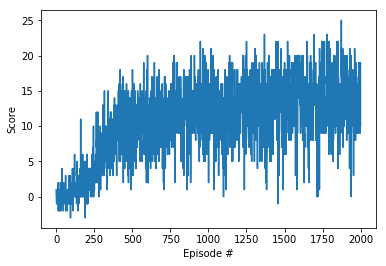

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# the resuls with the dropout on the local network are stored in the file scores_2.txt
path_scores = '../data/scores_2.txt'
with open(path_scores) as f:
    array_scores = np.array([float(item) for item in f.readlines()])
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(array_scores)), array_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

- The introduction of the drop out make the learning **slower** and I did **not reach the same target** of previous experiment. 
- Maybe if I had more hidden layers (more capacity to the model) the dropoutout approach will be more useful
- As you can see below the increment score from one group of episodes to the other is quite **low**.

| episode_num | avg_eps     | average_score | move forward | move backward | turn left | turn right | increment score |
|-------------|-------------|---------------|--------------|---------------|-----------|------------|-----------------|
| 100         | 0.608814509 | 0.06          | 0.43         | 0.17          | 0.13      | 0.27       |                 |
| 200         | 0.368801831 | 1.49          | 0.07         | 0.1           | 0.55      | 0.28       | 23.83333333     |
| 300         | 0.223409246 | 3.7           | 0.27         | 0.05          | 0.61      | 0.07       | 1.483221477     |
| 400         | 0.135334717 | 7.63          | 0.52         | 0.02          | 0.42      | 0.04       | 1.062162162     |
| 500         | 0.08198177  | 9.86          | 0.84         | 0.02          | 0.11      | 0.03       | 0.292267366     |
| 600         | 0.049662133 | 10.41         | 0.34         | 0             | 0.34      | 0.32       | 0.055780933     |
| 700         | 0.030083852 | 10.34         | 0.66         | 0             | 0.15      | 0.19       | -0.006724304    |
| 800         | 0.018223908 | 11.62         | 0.84         | 0.01          | 0.02      | 0.13       | 0.123791103     |
| 900         | 0.011039505 | 11.7          | 0.84         | 0             | 0.03      | 0.13       | 0.006884682     |
| 1000        | 0.006687406 | 12.81         | 0.86         | 0             | 0.02      | 0.12       | 0.094871795     |
| 1100        | 0.004051033 | 11.75         | 0.18         | 0             | 0.37      | 0.45       | -0.082747853    |
| 1200        | 0.002453996 | 11.7          | 0.95         | 0             | 0         | 0.05       | -0.004255319    |
| 1300        | 0.001486558 | 12.97         | 0.82         | 0             | 0.05      | 0.13       | 0.108547009     |
| 1400        | 0.001       | 13.33         | 0.75         | 0             | 0.11      | 0.14       | 0.027756361     |
| 1500        | 0.001       | 13.27         | 0.03         | 0             | 0.38      | 0.59       | -0.004501125    |
| 1600        | 0.001       | 14.56         | 0.83         | 0             | 0.06      | 0.11       | 0.097211756     |
| 1700        | 0.001       | 13.56         | 0.86         | 0             | 0.14      | 0          | -0.068681319    |
| 1800        | 0.001       | 13.7          | 0.84         | 0             | 0.12      | 0.04       | 0.010324484     |
| 1900        | 0.001       | 13.64         | 0.8          | 0             | 0.07      | 0.13       | -0.004379562    |
| 2000        | 0.001       | 13.5          | 0.8          | 0             | 0.12      | 0.08       | -0.01026393     |

## Future works:
- Change the [Huber-Loss](https://en.wikipedia.org/wiki/Huber_loss) function  as described [in the official Pythorch tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)
- Add the [Dueling DQN](https://arxiv.org/abs/1511.06581) and the [Prioritized Experience Replay](https://arxiv.org/abs/1511.05952) as described in the lesson, to help to sepate the importance of the state from the value of the q functions, and see if this helps to reduce the saturation phenomena described above.